예측 모델들과 여러 실험 세팅, 함수들은 각각 독립적으로 관리됩니다.

이에 이 코드를 재현/활용하기 위해서는 반드시 깃허브에 있는 레포지토리를 모두 워킹디렉토리에 넣어두셔야 합니다.

https://github.com/Reign2121/Bitcoin_Price_Forecasting

In [80]:
import os
import pandas as pd
import numpy as np

#pip install plotly
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from prophet import Prophet

# EDA

In [81]:
# data경로 확보
full_path  = os.getcwd()
data_path  = os.path.join(full_path, 'data/')
results_path = os.path.join(full_path, 'results/')

# csv파일 경로 확보
train_path  = os.path.join(data_path, 'train.csv')
sample_path = os.path.join(data_path, 'sample_submission.csv')

In [82]:
Bitcoin_price = pd.read_csv(train_path)

In [83]:
target = "Close"
cols = list(Bitcoin_price.columns) #raw 데이터의 컬럼들을 리스트에 담음
cols.remove(target) #타겟 제거
cols.remove('Time') #날짜 제거

Bitcoin_price = Bitcoin_price[['Time'] + cols + [target]] 

In [84]:
# 데이트타임으로 변환
Bitcoin_price['Time'] = pd.to_datetime(Bitcoin_price['Time'])

Bitcoin_price['year'] = Bitcoin_price.Time.dt.year
Bitcoin_price['month'] = Bitcoin_price.Time.dt.month
Bitcoin_price['week'] = Bitcoin_price.Time.dt.isocalendar().week
Bitcoin_price['dayofweek'] = Bitcoin_price.Time.dt.dayofweek
Bitcoin_price['hour'] = Bitcoin_price.Time.dt.hour

from plotly.subplots import make_subplots 

위 라이브러리를 이용하여 대화형 그래프를 생성할 수 있습니다.

웹 브라우저 환경에서 보이지 않을 수 있으나 라이브러리 설치 후 직접 실행해보시면 대화형 그래프를 이용하실 수 있습니다.

In [85]:
fig1 = px.line(Bitcoin_price, x=Bitcoin_price['Time'], y='Close', color='year', title="Bitcoin_price", markers=True)

fig1.update_traces(line=dict(width=0))
fig1.show()

In [86]:
fig1 = px.line(Bitcoin_price, x=Bitcoin_price['Time'], y='Close', color='month', title="Bitcoin_price", markers=True)

fig1.update_traces(line=dict(width=0))
fig1.show()

In [87]:
# 찾고자 하는 날짜
target_date = pd.to_datetime('2020-09-01-00:00:00')

# 해당 날짜의 인덱스 찾기
index_of_target_date = Bitcoin_price[Bitcoin_price['Time'] == target_date].index[0]

print("해당하는 데이터의 인덱스:", index_of_target_date)

해당하는 데이터의 인덱스: 23274


현재의 추세룰 가장 잘 반영할 수 있다고 판단되는 구간으로 train set 분할

In [88]:
train_since2020_09 = Bitcoin_price.iloc[23274:,:]
train_since2020_09.to_csv(data_path + "train_since2020_09.csv", index=False)

# Prophet 실험

In [89]:
# data경로 확보
full_path  = os.getcwd()
data_path  = os.path.join(full_path, 'data/')
results_path = os.path.join(full_path, 'results/')

# csv파일 경로 확보
train_path  = os.path.join(data_path, 'train_since2020_09.csv')
sample_path = os.path.join(data_path, 'sample_submission.csv')

In [90]:
Bitcoin_price = pd.read_csv(train_path)

In [91]:
target = "Close"
cols = list(Bitcoin_price.columns) #raw 데이터의 컬럼들을 리스트에 담음
cols.remove(target) #타겟 제거
cols.remove('Time') #날짜 제거

Bitcoin_price = Bitcoin_price[['Time'] + cols + [target]] 

In [92]:
data = Bitcoin_price.drop(columns=cols)
data = data.rename(columns={'Time': 'ds', 'Close': 'y'})

13:55:48 - cmdstanpy - INFO - Chain [1] start processing
13:56:22 - cmdstanpy - INFO - Chain [1] done processing
/home/sgh/yes/envs/DACON/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



                       ds        yhat  yhat_lower  yhat_upper
31300 2024-03-29 00:00:00  704.050794  674.603636  733.284451
31301 2024-03-29 01:00:00  703.897247  676.626648  732.571201
31302 2024-03-29 02:00:00  703.666930  675.042043  731.886391
31303 2024-03-29 03:00:00  703.448901  676.102603  730.862756
31304 2024-03-29 04:00:00  703.338100  674.468147  732.316098
...                   ...         ...         ...         ...
31367 2024-03-31 19:00:00  702.437076  675.472659  732.442577
31368 2024-03-31 20:00:00  702.469684  675.238495  730.063403
31369 2024-03-31 21:00:00  702.521199  675.141247  731.538335
31370 2024-03-31 22:00:00  702.617182  671.994616  731.409873
31371 2024-03-31 23:00:00  702.736713  675.512297  731.282105

[72 rows x 4 columns]


/home/sgh/yes/envs/DACON/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/sgh/yes/envs/DACON/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



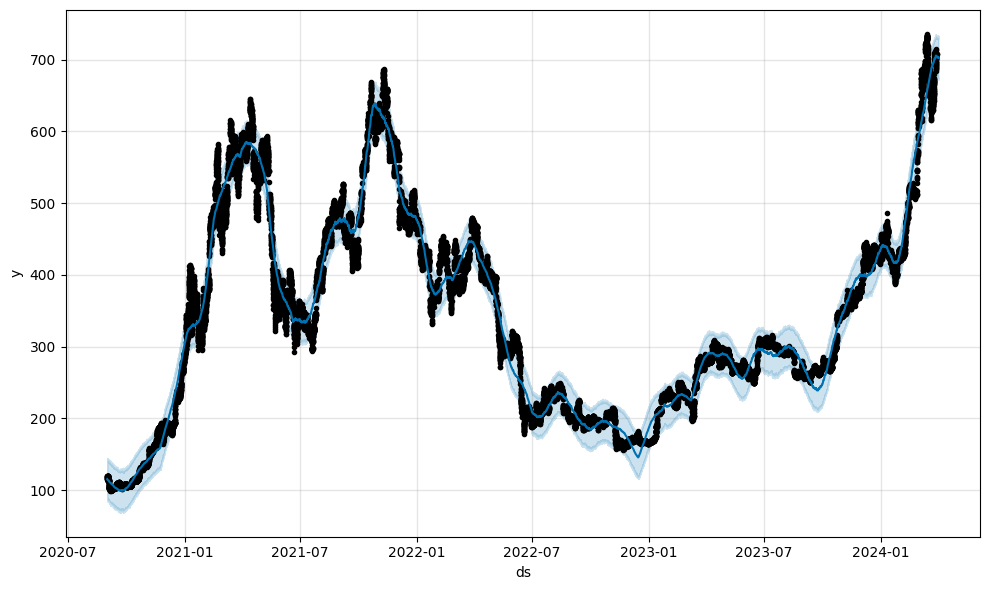

/home/sgh/yes/envs/DACON/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/sgh/yes/envs/DACON/lib/python3.10/site-packages/prophet/plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/sgh/yes/envs/DACON/lib/python3.10/site-packages/prophet/plot.py:401: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/sgh/yes/envs/DACON/lib/python3.10/site-p

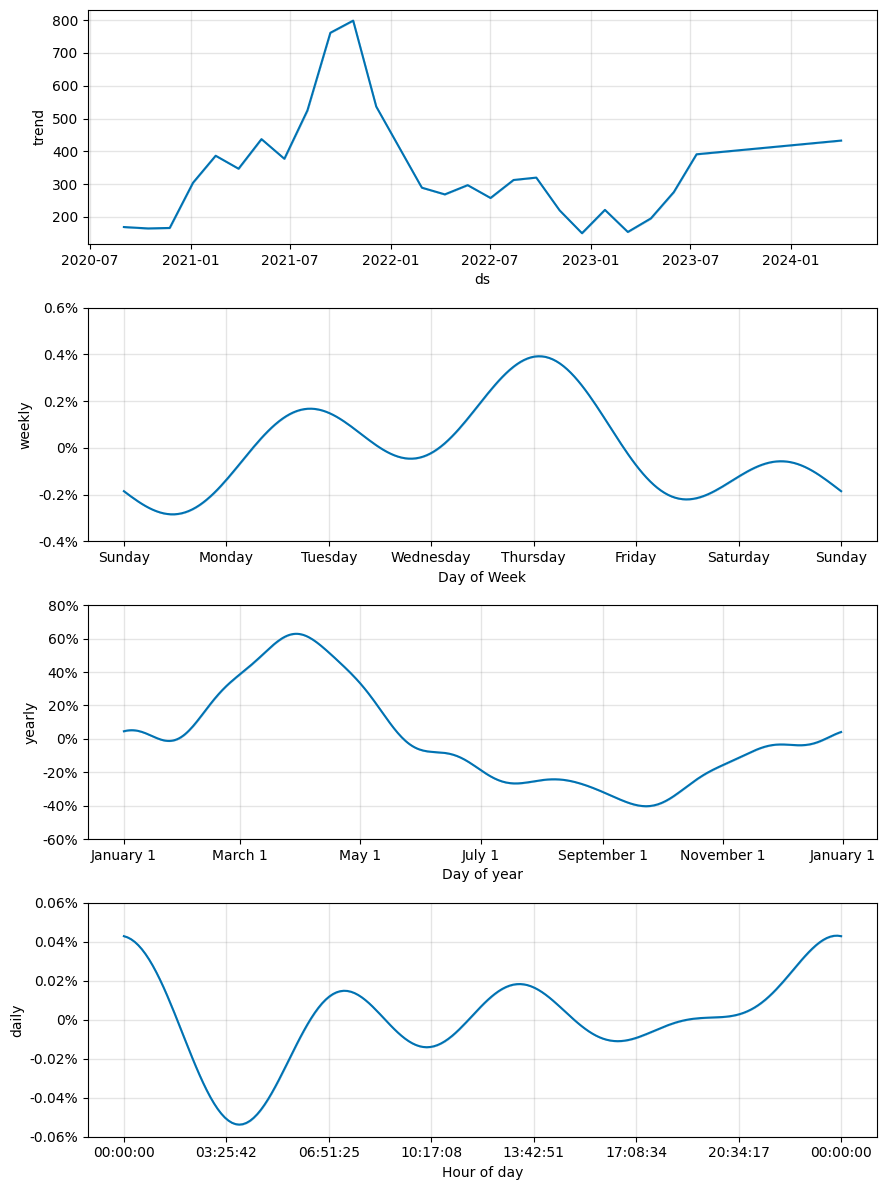

In [93]:
# 모델 초기화

model = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=True)
    #changepoints=changepoints)

# 모델 학습
model.fit(data)

# 예측할 미래 데이터프레임 생성
future = model.make_future_dataframe(periods=72, freq='H') #72시간 예측, 3일

# 예측
forecast = model.predict(future)

# 예측 결과 출력 (마지막 10개 시점 확인)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(72)) 

# 예측 결과 시각화
fig1 = model.plot(forecast)
plt.show()

# 구성 요소 시각화 (트렌드, 주기성 등)
fig2 = model.plot_components(forecast)
plt.show()

In [94]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(72))

                       ds        yhat  yhat_lower  yhat_upper
31300 2024-03-29 00:00:00  704.050794  674.603636  733.284451
31301 2024-03-29 01:00:00  703.897247  676.626648  732.571201
31302 2024-03-29 02:00:00  703.666930  675.042043  731.886391
31303 2024-03-29 03:00:00  703.448901  676.102603  730.862756
31304 2024-03-29 04:00:00  703.338100  674.468147  732.316098
...                   ...         ...         ...         ...
31367 2024-03-31 19:00:00  702.437076  675.472659  732.442577
31368 2024-03-31 20:00:00  702.469684  675.238495  730.063403
31369 2024-03-31 21:00:00  702.521199  675.141247  731.538335
31370 2024-03-31 22:00:00  702.617182  671.994616  731.409873
31371 2024-03-31 23:00:00  702.736713  675.512297  731.282105

[72 rows x 4 columns]


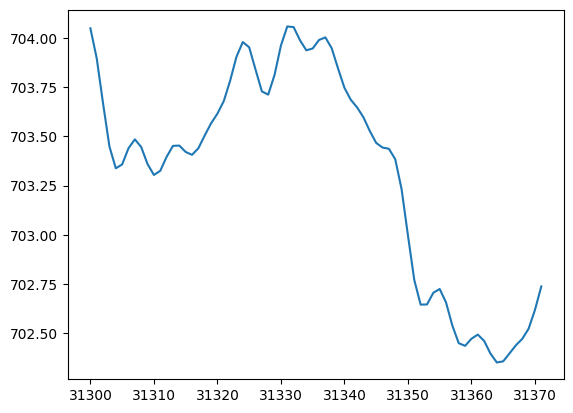

In [95]:
plt.plot(forecast.iloc[31300:,]['yhat'])

In [96]:
forecast.iloc[31300:,].to_csv(data_path + "prophet_72.csv")

# LTSF(장기 시계열 예측) 실험

GPU: NVIDIA RTX 3090

## DLinear

Train, 학습 기록은 log 폴더에, 저장된 모델은 checkpoints 폴더 속 model_id에에 저장됨

In [97]:
import os

if not os.path.exists("./logs"):
    os.makedirs("./logs")

if not os.path.exists("./logs/LongForecasting"):
    os.makedirs("./logs/LongForecasting")

# data경로 확보
full_path  = os.getcwd()
data_path  = os.path.join(full_path, 'data/')

pred_len = 1612
model_name1 = "DLinear"

os.system(f"""
python -u run_longExp.py \\
  --is_training 1 \\
  --train_only True \\
  --root_path {data_path} \\
  --data_path 'train.csv' \\
  --model_id DLinear_1124to1612_train_only \\
  --model {model_name1} \\
  --data custom \\
  --features M \\
  --target Close \\
  --seq_len 1124 \\
  --pred_len {pred_len} \\
  --enc_in 8 \\
  --des 'Exp' \\
  --itr 1 --batch_size 8 --learning_rate 0.0005 >logs/LongForecasting/1124to1612_{model_name1}_train_only.log  
""")

0

Forecasting

In [98]:
import os

if not os.path.exists("./logs"):
    os.makedirs("./logs")

if not os.path.exists("./logs/LongForecasting"):
    os.makedirs("./logs/LongForecasting")

# data경로 확보
full_path  = os.getcwd()
data_path  = os.path.join(full_path, 'data/')

pred_len = 1612
model_name1 = "DLinear"

#is_training 0으로 바꿔주기

os.system(f"""
python -u run_longExp.py \\
  --is_training 0 \\
  --train_only True \\
  --root_path {data_path} \\
  --data_path 'train.csv' \\
  --model_id {model_name1}_1124to1612_train_only \\
  --model {model_name1} \\
  --data custom \\
  --features M \\
  --target Close \\
  --seq_len 1124 \\
  --pred_len {pred_len} \\
  --enc_in 8 \\
  --des 'Exp' \\
  --itr 1 --batch_size 8 --learning_rate 0.0005 >logs/LongForecasting/Forecasting_1124to1612_{model_name1}_train_only.log  
""")

0

## NLinear

Train, 학습 기록은 log 폴더에, 저장된 모델은 checkpoints 폴더 속 model_id에에 저장됨

In [99]:
import os

if not os.path.exists("./logs"):
    os.makedirs("./logs")

if not os.path.exists("./logs/LongForecasting"):
    os.makedirs("./logs/LongForecasting")

# data경로 확보
full_path  = os.getcwd()
data_path  = os.path.join(full_path, 'data/')

pred_len = 1612
model_name2 = "NLinear"

os.system(f"""
python -u run_longExp.py \\
  --is_training 1 \\
  --train_only True \\
  --root_path {data_path} \\
  --data_path 'train.csv' \\
  --model_id NLinear_1124to1612_train_only \\
  --model {model_name2} \\
  --data custom \\
  --features M \\
  --target Close \\
  --seq_len 1124 \\
  --pred_len {pred_len} \\
  --enc_in 8 \\
  --des 'Exp' \\
  --itr 1 --batch_size 8 --learning_rate 0.0005 >logs/LongForecasting/1124to1612_{model_name2}_train_only.log 
""")

0

Forecasting

In [100]:
import os

if not os.path.exists("./logs"):
    os.makedirs("./logs")

if not os.path.exists("./logs/LongForecasting"):
    os.makedirs("./logs/LongForecasting")

# data경로 확보
full_path  = os.getcwd()
data_path  = os.path.join(full_path, 'data/')

pred_len = 1612
model_name2 = "NLinear"

#is_training 0으로 바꿔주기

os.system(f"""
python -u run_longExp.py \\
  --is_training 0 \\
  --train_only True \\
  --root_path {data_path} \\
  --data_path 'train.csv' \\
  --model_id {model_name2}_1124to1612_train_only \\
  --model {model_name2} \\
  --data custom \\
  --features M \\
  --target Close \\
  --seq_len 1124 \\
  --pred_len {pred_len} \\
  --enc_in 8 \\
  --des 'Exp' \\
  --itr 1 --batch_size 8 --learning_rate 0.0005 >logs/LongForecasting/Forecasting_1124to1612_{model_name2}_train_only.log 
""")

0

# Submission

In [101]:
# data경로 확보
full_path  = os.getcwd()
data_path  = os.path.join(full_path, 'data/')
results_path = os.path.join(full_path, 'results/')

# csv파일 경로 확보
train_path  = os.path.join(data_path, 'train.csv')
sample_path = os.path.join(data_path, 'sample_submission.csv')

In [102]:
Bitcoin_price = pd.read_csv(train_path)
sample_submission = pd.read_csv(sample_path)

In [103]:
target = "Close"
cols = list(Bitcoin_price.columns) #raw 데이터의 컬럼들을 리스트에 담음
cols.remove(target) #타겟 제거
cols.remove('Time') #날짜 제거

Bitcoin_price = Bitcoin_price[['Time'] + cols + [target]] 

In [104]:
Bitcoin_price

Time    Open    High     Low       Volume  \
0      2018-01-01 00:00:00  137.16  137.16  134.00   448.356199   
1      2018-01-01 01:00:00  135.29  135.96  131.55   388.697006   
2      2018-01-01 02:00:00  132.03  134.18  132.00   434.064572   
3      2018-01-01 03:00:00  133.30  136.11  132.90   425.087030   
4      2018-01-01 04:00:00  134.35  136.23  133.22   345.807329   
...                    ...     ...     ...     ...          ...   
54569  2024-03-28 19:00:00  705.49  709.13  704.82  1233.569390   
54570  2024-03-28 20:00:00  707.98  708.75  706.19   754.731310   
54571  2024-03-28 21:00:00  706.73  709.06  706.54   603.941410   
54572  2024-03-28 22:00:00  707.81  708.81  705.41   789.633720   
54573  2024-03-28 23:00:00  708.47  710.73  706.87   854.455750   

            quote_av  trades  tb_base_av    tb_quote_av   Close  
0       60938.151102    5233  233.521921   31742.292816  135.29  
1       51978.180847    4539  185.840403   24854.840552  132.03  
2       57684.143554    4892  197.237935   26215.165628  133.30  
3       57011.962962    4794  142.918407   19172.428559  134.10  
4       46674.215567    4568  177.957635   24022.525818  136.01  
...              ...     ...         ...            ...     ...  
54569  871989.082208   82625  621.745210  439518.571710  707.98  
54570  533942.900430   59964  357.794750  253144.400614  706.73  
54571  427345.556770   45225  323.370640  228831.685668  707.81  
54572  558802.030425   50729  391.559820  277113.932578  708.47  
54573  605391.121388   60037  430.593590  305097.776542  707.80  

[54574 rows x 10 columns]

In [105]:
D_file_path = results_path + "DLinear_1124to1612_train_only_DLinear_custom_ftM_sl1124_ll48_pl1612_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/real_prediction.npy"
DLinear_forecasting = np.load(D_file_path)

N_file_path = results_path + "NLinear_1124to1612_train_only_NLinear_custom_ftM_sl1124_ll48_pl1612_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0/real_prediction.npy"
NLinear_forecasting = np.load(N_file_path)

In [106]:
print(DLinear_forecasting)
print("________________________________________________________________________")
print(NLinear_forecasting)

[[6.9729395e+02 7.0030621e+02 6.9647168e+02 ... 4.7714563e+02
  3.3168906e+05 6.9834033e+02]
 [7.0506384e+02 7.0522913e+02 7.0274579e+02 ... 1.4200194e+02
  1.4557019e+05 7.0266193e+02]
 [6.9917017e+02 7.0022430e+02 6.9568225e+02 ... 4.6070801e+02
  3.4684119e+05 6.9771143e+02]
 ...
 [6.1082257e+02 6.1292993e+02 6.0753986e+02 ... 1.0860284e+03
  5.7123500e+05 6.1059961e+02]
 [6.1661108e+02 6.1958746e+02 6.1406409e+02 ... 1.1456406e+03
  6.0415756e+05 6.1696442e+02]
 [6.1083789e+02 6.1290784e+02 6.0663489e+02 ... 1.2978619e+03
  6.9995244e+05 6.0954865e+02]]
________________________________________________________________________
[[7.0119110e+02 7.0456793e+02 7.0014655e+02 ... 6.0986572e+02
  4.2379684e+05 7.0243237e+02]
 [7.0445435e+02 7.0484998e+02 7.0236163e+02 ... 1.7759886e+02
  1.7191659e+05 7.0238385e+02]
 [7.0266693e+02 7.0402887e+02 6.9968915e+02 ... 4.9149219e+02
  3.6836006e+05 7.0156042e+02]
 ...
 [6.7721820e+02 6.8013330e+02 6.7390332e+02 ... 1.1357112e+03
  6.9805594e+05 6

In [107]:
# 열 이름
columns = Bitcoin_price.drop(columns="Time").columns
# 데이터프레임 생성
D_submission = pd.DataFrame(DLinear_forecasting, columns=columns)
# 결과 확인
print(D_submission.head())

print("________________________________________________________________________")

# 열 이름
columns = Bitcoin_price.drop(columns="Time").columns
# 데이터프레임 생성
N_submission = pd.DataFrame(NLinear_forecasting, columns=columns)
# 결과 확인
print(N_submission.head())

         Open        High         Low      Volume     quote_av        trades  \
0  697.293945  700.306213  696.471680  884.589600  613067.8750  53215.273438   
1  705.063843  705.229126  702.745789  380.274445  347747.5000  39047.054688   
2  699.170166  700.224304  695.682251  956.666016  715202.5625  60784.175781   
3  691.815918  692.096436  688.340698  634.486572  490431.3125  43346.363281   
4  698.016357  700.180237  696.103943  718.937256  563664.5625  54092.187500   

   tb_base_av    tb_quote_av       Close  
0  477.145630  331689.062500  698.340332  
1  142.001938  145570.187500  702.661926  
2  460.708008  346841.187500  697.711426  
3  268.528320  217531.546875  689.838257  
4  328.464600  265684.562500  698.654724  
________________________________________________________________________
         Open        High         Low       Volume     quote_av        trades  \
0  701.191101  704.567932  700.146545  1121.739014  779114.2500  60424.531250   
1  704.454346  704.849976 

In [108]:
D_submission = D_submission.shift(-100).iloc[:1512,:] #100시점 shitt 
N_submission = N_submission.shift(-100).iloc[:1512,:] #100시점 shitt

In [109]:
DLinear_submission = sample_submission.copy()
DLinear_submission[target] = D_submission[target]
DLinear_submission.to_csv(data_path+ "DLinear_train_only.csv", index=False) #1124to1612_train.csv

DLinear with valid score: 22.9591636495  (전체 데이터를 학습한 것이 아니라 학습 검정 데이터 분할하여 학습했을 때) (70%만 학습)</br>
DLinear를 기본 모델, backbone으로 채택

In [110]:
NLinear_submission = sample_submission.copy()
NLinear_submission[target] = N_submission[target]
NLinear_submission.to_csv(data_path+ "NLinear_train_only.csv", index=False) #1124to1612_train.csv

## 예측 시각화

In [111]:
prophet = pd.read_csv(data_path + "prophet_72.csv")

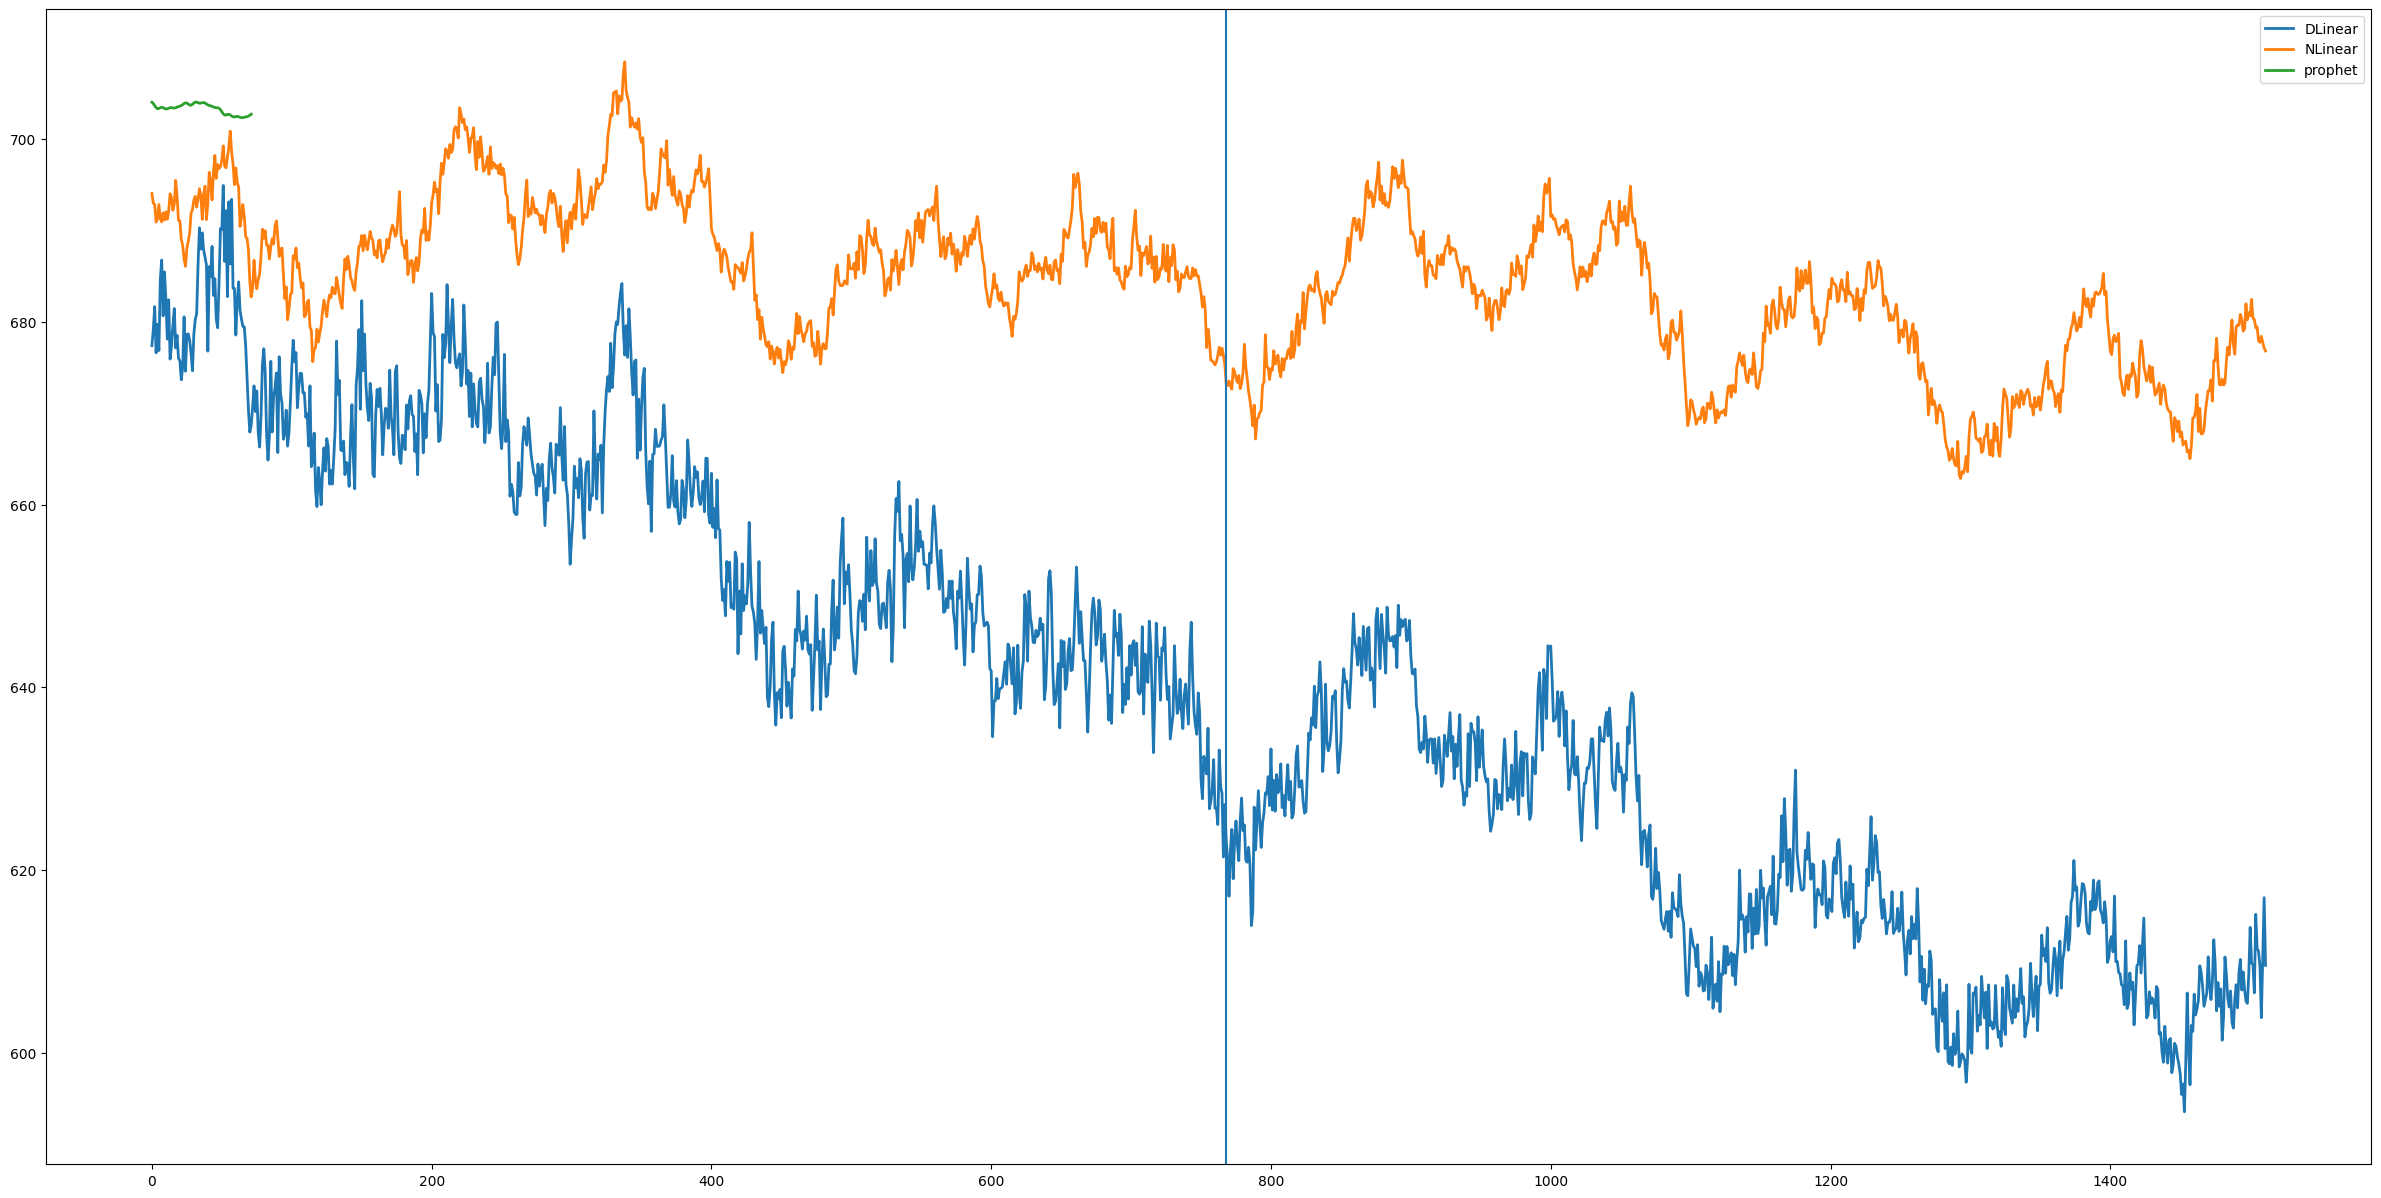

In [112]:
plt.figure(figsize=(30,15))

plt.plot(DLinear_submission['Close'], label='DLinear', linewidth=2)
plt.plot(NLinear_submission['Close'], label='NLinear', linewidth=2)
plt.plot(prophet['yhat'], label='prophet', linewidth=2)

plt.axvline(x=768) #private 시작 
plt.legend()
plt.show()

## 앙상블

DLinear 예측값의 앞 72시점(약 3일)을 prophet의 예측값으로 대체

In [113]:
DLinear_submission['Close'][:72] = prophet['yhat']

/tmp/ipykernel_25168/784586103.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipykernel_25168/784586103.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

DLinear & Prophet 앙상블 Submission Score: 22.2526836463 </br>
(전체 데이터를 학습한 것이 아니라 학습 검정 데이터 분할하여 학습했을 때) (70%만 학습)</br></br>

크기는 미미하지만 약간의 성능 향상이 관측되어 위 방법론 채택하였음

In [114]:
final_submission = DLinear_submission.copy()

private 시점(768 이후)의 불안정성, 뒤바뀔 추세를 감안한 DLinear와 NLinear의 앙상블</br></br>
public은 지금까지 스코어가 가장 높은 DLinear와 Prophet의 앙상블로 구성하고,</br>
private은 DLinear와 NLinear의 앙상블로 구성

In [115]:
voting1 = DLinear_submission
voting2 = NLinear_submission

In [116]:
v1 = voting1.iloc[768:,]

In [117]:
v2 = voting2.iloc[768:,]

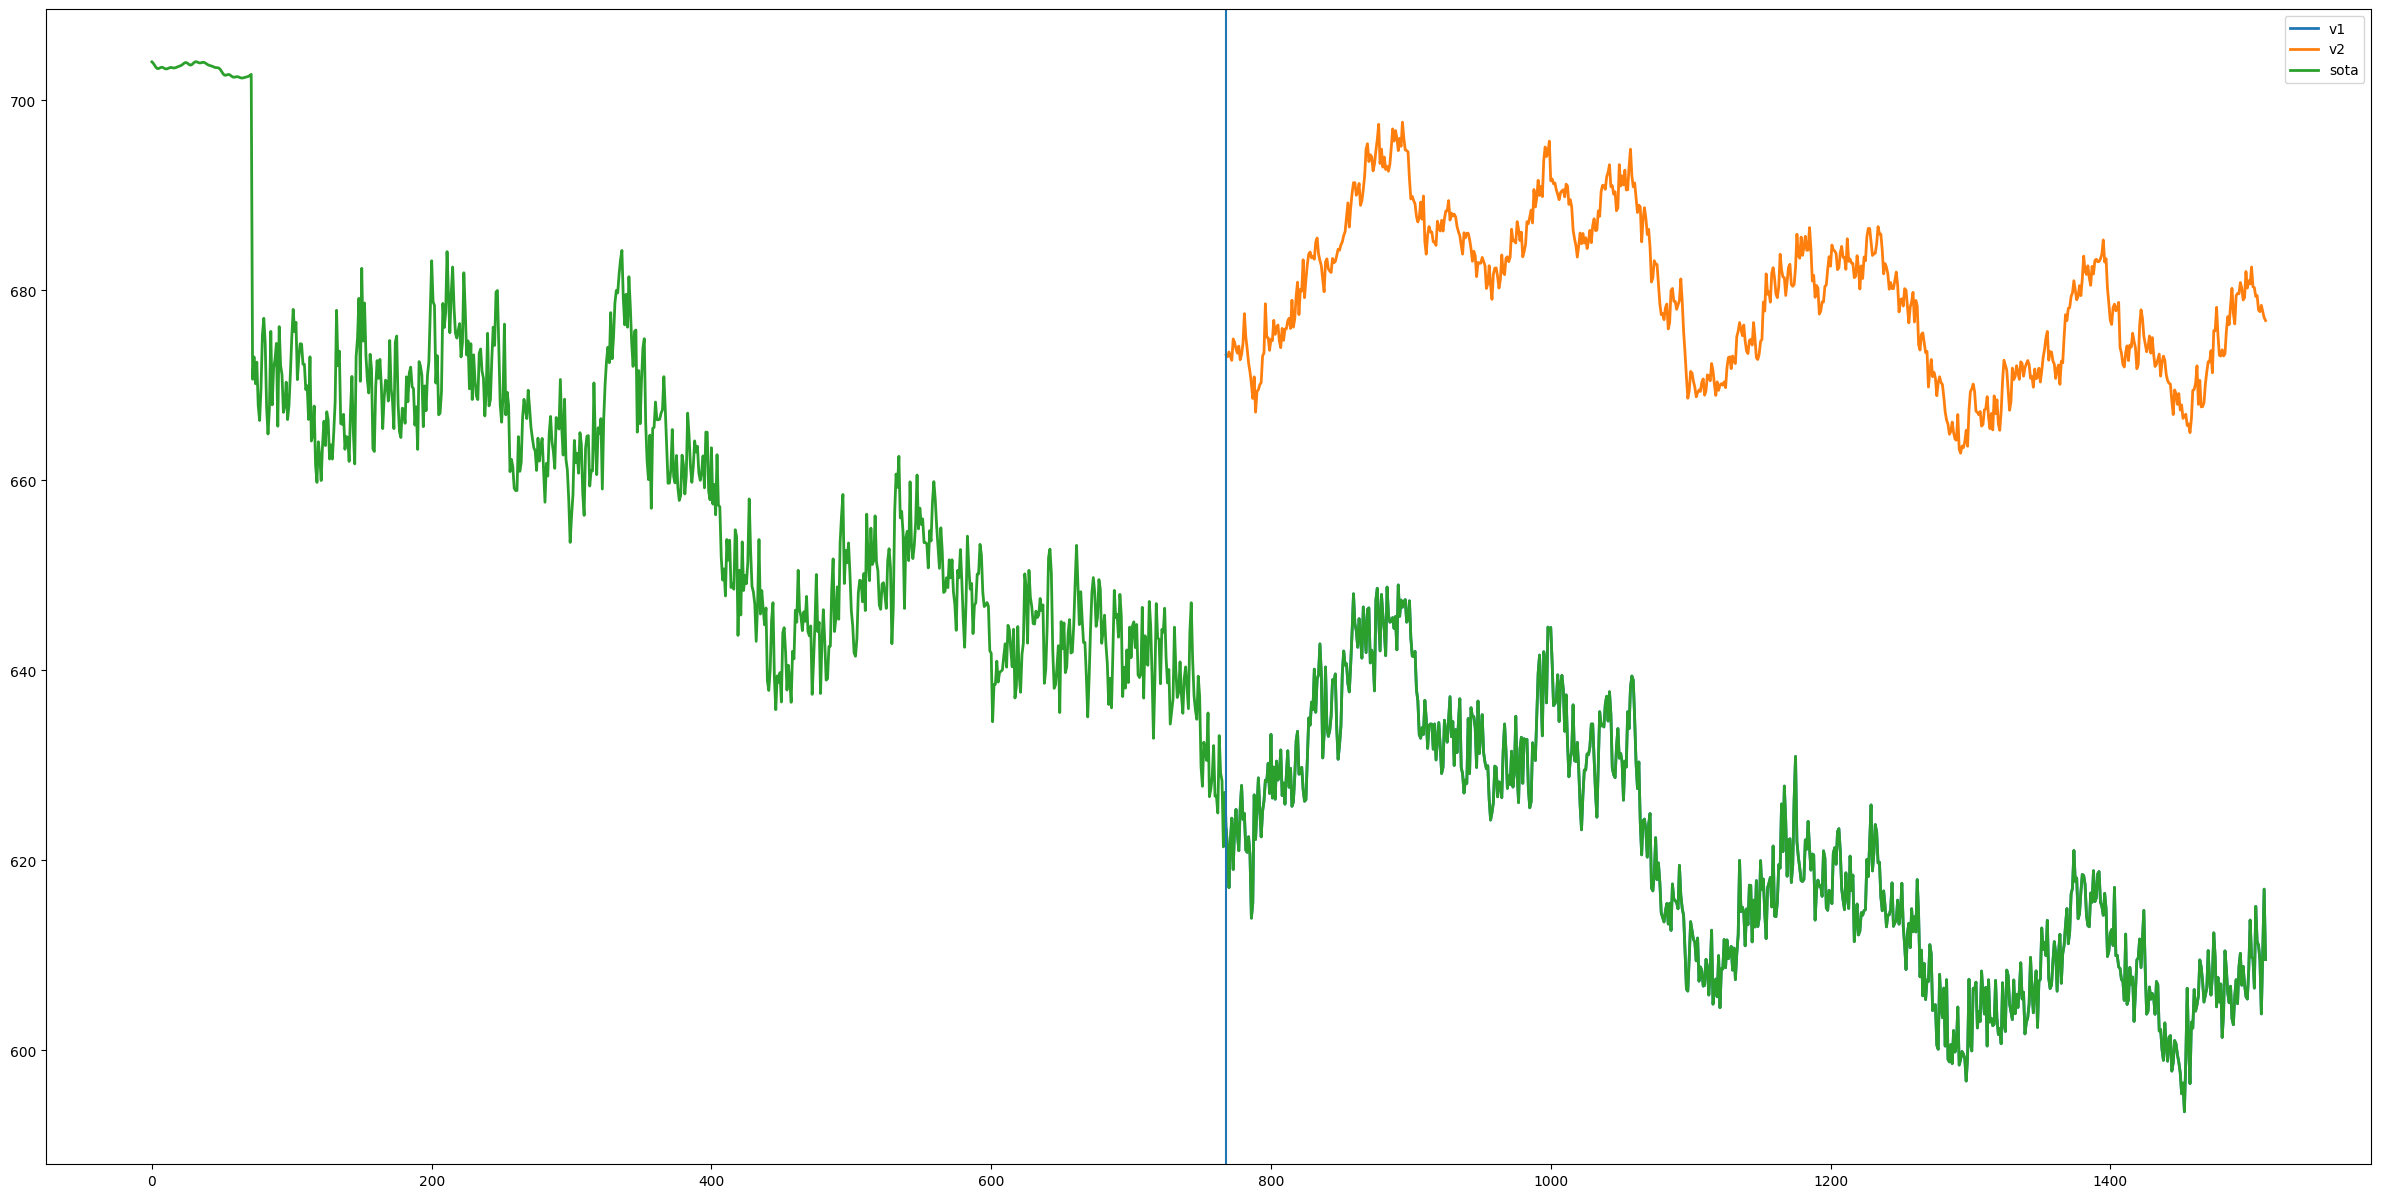

In [118]:
plt.figure(figsize=(30,15))

plt.plot(v1['Close'], label='v1', linewidth=2)
plt.plot(v2['Close'], label='v2', linewidth=2)
plt.plot(DLinear_submission['Close'], label='sota', linewidth=2)


plt.axvline(x=768)

plt.legend()
plt.show()

In [119]:
voting = pd.merge(v1, v2, on='Time', how='inner')
voting

Time     Close_x     Close_y
0    2024-04-30 00:00:00  623.256409  673.198730
1    2024-04-30 01:00:00  621.260376  673.012695
2    2024-04-30 02:00:00  617.118958  673.515198
3    2024-04-30 03:00:00  622.079163  673.009277
4    2024-04-30 04:00:00  624.438477  672.626709
..                   ...         ...         ...
739  2024-05-30 19:00:00  609.453491  677.753723
740  2024-05-30 20:00:00  603.829895  678.423279
741  2024-05-30 21:00:00  610.599609  677.750732
742  2024-05-30 22:00:00  616.964417  677.123230
743  2024-05-30 23:00:00  609.548645  676.821838

[744 rows x 3 columns]

In [120]:
# 'Close' 열 생성: 'Close_x'와 'Close_y'의 평균
voting['Close'] = voting[['Close_x', 'Close_y']].mean(axis=1)
voting = voting.drop(columns=['Close_x', 'Close_y'])

In [121]:
voting['Close']

0      648.227570
1      647.136536
2      645.317078
3      647.544220
4      648.532593
          ...    
739    643.603607
740    641.126587
741    644.175171
742    647.043823
743    643.185242
Name: Close, Length: 744, dtype: float64

In [122]:
final_submission.iloc[768:,1] = voting['Close']

In [123]:
final_submission

Time       Close
0     2024-03-29 00:00:00  704.050794
1     2024-03-29 01:00:00  703.897247
2     2024-03-29 02:00:00  703.666930
3     2024-03-29 03:00:00  703.448901
4     2024-03-29 04:00:00  703.338100
...                   ...         ...
1507  2024-05-30 19:00:00  643.603607
1508  2024-05-30 20:00:00  641.126587
1509  2024-05-30 21:00:00  644.175171
1510  2024-05-30 22:00:00  647.043823
1511  2024-05-30 23:00:00  643.185242

[1512 rows x 2 columns]

In [124]:
final_submission.to_csv(data_path + "final_submission1.csv", index=False)